# Capstone Project 2

## Data Exploration and Cleaning

### Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import os
import glob
import matplotlib as mpl

In [2]:
mpl.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 12

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
type(train)

pandas.core.frame.DataFrame

In [5]:
train.head(100)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [6]:
print(train.comment_text[0])

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27


In [7]:
list(train)

['id',
 'comment_text',
 'toxic',
 'severe_toxic',
 'obscene',
 'threat',
 'insult',
 'identity_hate']

### Not all comments are toxic as shown above, however there are no other comment identifiers used for comments that are not toxic, severe_toxic, obscene, threat, insult, or identity_hate.

## Check for missing values

In [8]:
print("Check for missing values in Train dataset")
null_check=train.isnull().sum()
print(null_check)

Check for missing values in Train dataset
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [9]:
print("Check for missing values in Test dataset")
null_check=test.isnull().sum()
print(null_check)
print("filling NA with \"unknown\"")
train["comment_text"].fillna("unknown", inplace=True)
test["comment_text"].fillna("unknown", inplace=True)

Check for missing values in Test dataset
id              0
comment_text    0
dtype: int64
filling NA with "unknown"


## Determine the number of each comment type

In [10]:
toxic = train['toxic'].sum()
severe_toxic = train['severe_toxic'].sum()
obscene = train['obscene'].sum()
threat = train['threat'].sum()
insult = train['insult'].sum()
identity_hate = train['identity_hate'].sum()

In [11]:
print ('toxic comments', toxic)
print('severe toxic comments', severe_toxic)
print('obscene comments', obscene)
print('threatening comments', threat)
print('insulting comments', insult)
print('identity hate comments', identity_hate)

toxic comments 15294
severe toxic comments 1595
obscene comments 8449
threatening comments 478
insulting comments 7877
identity hate comments 1405


## Bar chart showing comment types

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
[0 1 2 3 4 5]
[15294, 1595, 8449, 478, 7877, 1405]


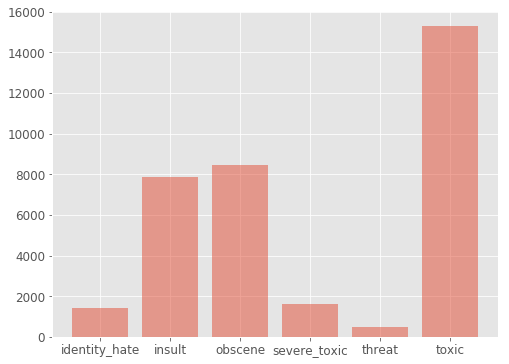

In [12]:
import matplotlib.pyplot as plt

num_comments = [toxic, severe_toxic, obscene, threat, insult, identity_hate]

objects = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
print(objects)
pos = np.arange(len(objects))
print (pos)
num_comments = [toxic, severe_toxic, obscene, threat, insult, identity_hate]
print(num_comments)
 
plt.bar(objects, num_comments, align='center', alpha=0.5)

plt.show()

### Check the column names for the dataframe: train

In [13]:
list(train)

['id',
 'comment_text',
 'toxic',
 'severe_toxic',
 'obscene',
 'threat',
 'insult',
 'identity_hate']

### Concatenate the train set and the test set and make a new dataframe, comment_length, containing the length of comments. Print out the new dataframe.

In [14]:
df = pd.concat([train, test], axis=0)

print(list(df))

comment_length = df['comment_text'].apply(len)

print(comment_length)

['comment_text', 'id', 'identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']
0          264
1          112
2          233
3          622
4           67
5           65
6           44
7          115
8          472
9           70
10        2875
11          56
12         319
13         819
14         219
15         610
16          57
17          48
18         118
19         440
20         266
21          58
22         543
23          97
24        1409
25         172
26         288
27         343
28         119
29          78
          ... 
153134     554
153135     144
153136     559
153137     274
153138     135
153139     314
153140     135
153141     234
153142     163
153143      18
153144     119
153145     541
153146     265
153147      63
153148     146
153149      51
153150     596
153151     181
153152      60
153153     382
153154      82
153155     137
153156     277
153157     255
153158      63
153159      60
153160     198
153161     423
153162     502
1531

In [15]:
df_len = pd.Series.to_frame(comment_length)

### Assign 'comment_text'  as column name.

In [16]:
df_len.columns = ['comment_text']

In [17]:
# Check the type of df_len

type(df_len)

pandas.core.frame.DataFrame

In [18]:
# verify column label

list(df_len)

['comment_text']

## Plot number of letters in each comment

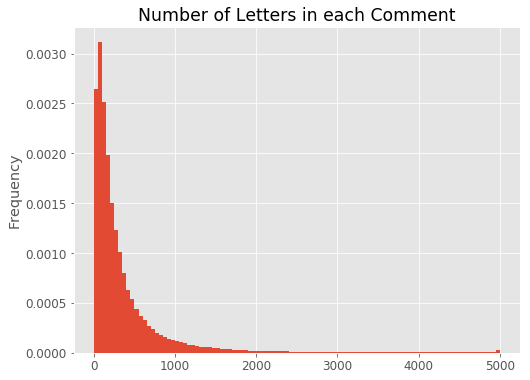

In [19]:
import matplotlib.pyplot as plt


letter_plot = df_len.plot(use_index = True, kind = 'hist', normed = 1, bins = 100, legend = None)
plt.title('Number of Letters in each Comment')

plt.show()

## Determine number of words in each comment and plot distribution

In [20]:
df.head()

,comment_text,id,identity_hate,insult,obscene,severe_toxic,threat,toxic
0,Explanation\nWhy the edits made under my usern...,0000997932d777bf,0.0,0.0,0.0,0.0,0.0,0.0
1,D'aww! He matches this background colour I'm s...,000103f0d9cfb60f,0.0,0.0,0.0,0.0,0.0,0.0
2,"Hey man, I'm really not trying to edit war. It...",000113f07ec002fd,0.0,0.0,0.0,0.0,0.0,0.0
3,"""\nMore\nI can't make any real suggestions on ...",0001b41b1c6bb37e,0.0,0.0,0.0,0.0,0.0,0.0
4,"You, sir, are my hero. Any chance you remember...",0001d958c54c6e35,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df['word_count'] = df['comment_text'].apply(lambda x: len(str(x).split(" ")))
df[['comment_text','word_count']].head()

,comment_text,word_count
0,Explanation\nWhy the edits made under my usern...,42
1,D'aww! He matches this background colour I'm s...,18
2,"Hey man, I'm really not trying to edit war. It...",42
3,"""\nMore\nI can't make any real suggestions on ...",112
4,"You, sir, are my hero. Any chance you remember...",13


In [22]:
df['word_count'].max()

2834

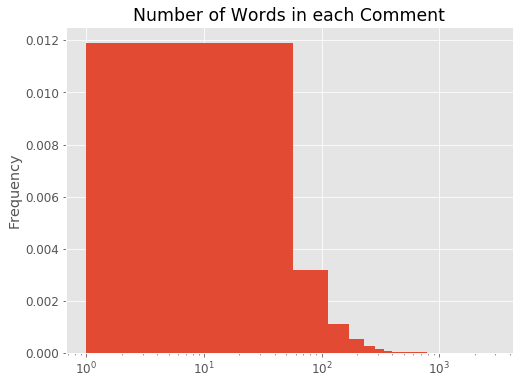

In [23]:
letter_plot = df['word_count'].plot(use_index = True, kind = 'hist', normed = 1, bins = 50, logx = True)
plt.title('Number of Words in each Comment')
bins = 25
legend = None

plt.show()

##  Drop comments less than 50 words in length from the data  frame

In [24]:
df = df.drop(df[df.word_count < 50].index)

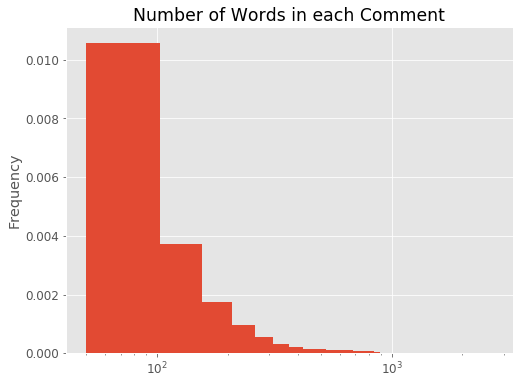

In [25]:
letter_plot = df['word_count'].plot(use_index = True, kind = 'hist', normed = 1, bins = 50, logx = True)
plt.title('Number of Words in each Comment')
bins = 25
legend = None

plt.show()

In [26]:
df.word_count.count()

46064

## Repeat the above steps for the separate train and test data sets

In [27]:
comment_length_train = train['comment_text'].apply(len)

In [28]:
train_len = pd.Series.to_frame(comment_length_train)

In [29]:
train_len.columns = ['comment_text']

In [30]:
type(train_len)

pandas.core.frame.DataFrame

In [31]:
train['word_count'] = train['comment_text'].apply(lambda x: len(str(x).split(" ")))
train[['comment_text','word_count']].head()

,comment_text,word_count
0,Explanation\nWhy the edits made under my usern...,42
1,D'aww! He matches this background colour I'm s...,18
2,"Hey man, I'm really not trying to edit war. It...",42
3,"""\nMore\nI can't make any real suggestions on ...",112
4,"You, sir, are my hero. Any chance you remember...",13


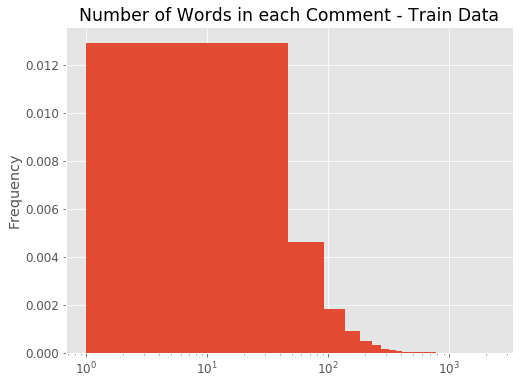

In [32]:
letter_plot = train['word_count'].plot(use_index = True, kind = 'hist', normed = 1, bins = 50, logx = True)
plt.title('Number of Words in each Comment - Train Data')
bins = 25
legend = None

plt.show()

In [33]:
comment_length_test = test['comment_text'].apply(len)

test_len = pd.Series.to_frame(comment_length_test)

test_len.columns = ['comment_text']

test['word_count'] = test['comment_text'].apply(lambda x: len(str(x).split(" ")))
test[['comment_text','word_count']].head()

,comment_text,word_count
0,Yo bitch Ja Rule is more succesful then you'll...,72
1,== From RfC == \n\n The title is fine as it is...,13
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",16
3,":If you have a look back at the source, the in...",38
4,I don't anonymously edit articles at all.,7


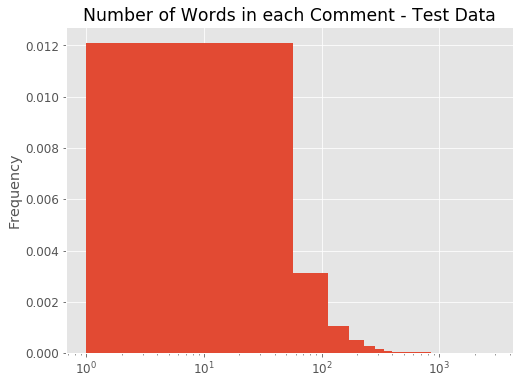

In [34]:
letter_plot = test['word_count'].plot(use_index = True, kind = 'hist', normed = 1, bins = 50, logx = True)
plt.title('Number of Words in each Comment - Test Data')
bins = 25
legend = None

plt.show()

## Drop comments less than 100 words in length from the Train data set

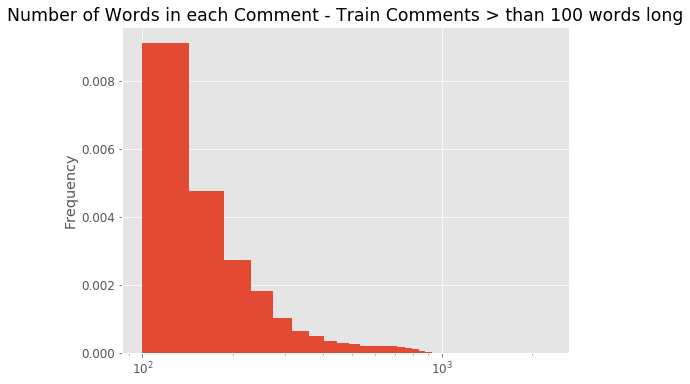

In [35]:
train = train.drop(train[train.word_count < 100].index)

letter_plot = train['word_count'].plot(use_index = True, kind = 'hist', normed = 1, bins = 50, logx = True)
plt.title('Number of Words in each Comment - Train Comments > than 100 words long')
bins = 25
legend = None

plt.show()

In [36]:
train.word_count.count()

28950

## Drop comments less than 100 words in length from the Test data set

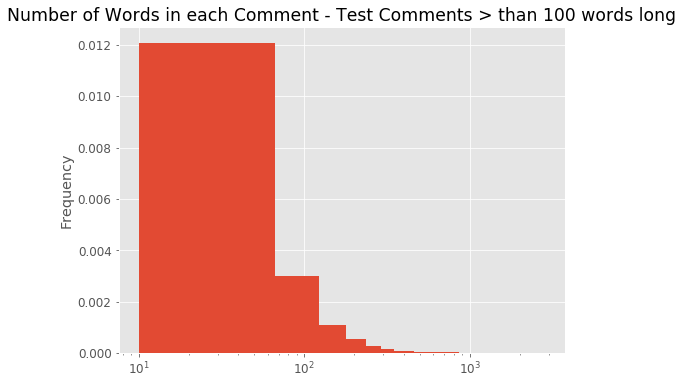

In [37]:
test = test.drop(test[test.word_count < 10].index)

letter_plot = test['word_count'].plot(use_index = True, kind = 'hist', normed = 1, bins = 50, logx = True)
plt.title('Number of Words in each Comment - Test Comments > than 100 words long')
bins = 25
legend = None

plt.show()

## Calculate word frequencies using TfidfVectorizer (Term Frequency – Inverse Document)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [39]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,word_count
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,112
10,0005300084f90edc,"""\nFair use rationale for Image:Wonju.jpg\n\nT...",0,0,0,0,0,0,489
13,0006f16e4e9f292e,Before you start throwing accusations and warn...,0,0,0,0,0,0,142
15,00078f8ce7eb276d,"""\n\nJuelz Santanas Age\n\nIn 2002, Juelz Sant...",0,0,0,0,0,0,116
24,000cfee90f50d471,"""\n\nRe-considering 1st paragraph edit?\nI don...",0,0,0,0,0,0,234


In [40]:
test.head()

,id,comment_text,word_count
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,72
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,13
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",16
3,00017563c3f7919a,":If you have a look back at the source, the in...",38
5,0001ea8717f6de06,Thank you for understanding. I think very high...,16


In [41]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,word_count
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,112
10,0005300084f90edc,"""\nFair use rationale for Image:Wonju.jpg\n\nT...",0,0,0,0,0,0,489
13,0006f16e4e9f292e,Before you start throwing accusations and warn...,0,0,0,0,0,0,142
15,00078f8ce7eb276d,"""\n\nJuelz Santanas Age\n\nIn 2002, Juelz Sant...",0,0,0,0,0,0,116
24,000cfee90f50d471,"""\n\nRe-considering 1st paragraph edit?\nI don...",0,0,0,0,0,0,234


In [42]:
y = df.comment_text

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df['comment_text'], y, test_size = 0.33, random_state = 53)

## initialize a CountVectorizer object

In [44]:
count_vectorizer = CountVectorizer(stop_words = 'english')

## Transform the training data using only the text column values

In [45]:
count_train = count_vectorizer.fit_transform(X_train)

## Transform the test data using only the text column values

In [46]:
count_test = count_vectorizer.fit_transform(X_test)

## Print the first 10 features of the count_vectorizer

In [47]:
print(count_vectorizer.get_feature_names()[:10])

['00', '000', '00000', '000000', '00000000', '000000000000000', '00000003', '00000010', '00000020', '00000030']


## Initialize a TfidVectorizer object

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

## Transform the training data

In [49]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

print(tfidf_train)

  (0, 44968)	0.0931861429128
  (0, 64783)	0.242385139393
  (0, 30607)	0.194799658916
  (0, 100557)	0.0897253880442
  (0, 51537)	0.545304662316
  (0, 4912)	0.104529235123
  (0, 92678)	0.388905825958
  (0, 22777)	0.125158739382
  (0, 20681)	0.240284703825
  (0, 93239)	0.240284703825
  (0, 17956)	0.0938125419028
  (0, 76158)	0.157294753711
  (0, 45563)	0.231131608881
  (0, 57100)	0.212004444527
  (0, 30173)	0.0833100825208
  (0, 82023)	0.141790763984
  (0, 14270)	0.172100696858
  (0, 79956)	0.0799321113066
  (0, 85609)	0.137365575709
  (0, 52494)	0.161698111722
  (0, 30338)	0.0587154323199
  (0, 9329)	0.111078720833
  (0, 106783)	0.0788891278126
  (0, 96625)	0.0607599069442
  (0, 78992)	0.153131395454
  :	:
  (30861, 36278)	0.102770650131
  (30861, 24449)	0.0915457375417
  (30861, 106841)	0.121270616845
  (30861, 93148)	0.139422502032
  (30861, 75635)	0.102569714254
  (30861, 34476)	0.111227518505
  (30861, 17251)	0.105299057354
  (30861, 59580)	0.107266141
  (30861, 49686)	0.137913185193

## Transform the test data

In [50]:
tfidf_test = tfidf_vectorizer.transform(X_test)

## Print the first 10 features

In [51]:
print(tfidf_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '00000', '000000', '00000000', '0000000000000000000000000000', '000002974001', '0000030422', '0000035']


## Print the first 5 vectors of the tfidf training data

In [52]:
print(tfidf_train[:5].A)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [53]:
type(count_train)

scipy.sparse.csr.csr_matrix

In [54]:
import scipy
from scipy.sparse import csr_matrix
#csr_matrix(count_train).toarray()
count_train.A
count_train.todense()
#count_train = count_train.A

MemoryError: 

## Creat the CountVectorizer dataframe

In [ ]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [ ]:
print (count_train)

In [ ]:
print(count_vectorizer.get_feature_names())

## Trying to figure out the count_train.A

In [ ]:
print(tfidf_train[:5])

In [ ]:
print(count_train.A)

In [ ]:
count_df = pd.DataFrame(count_train.A, columns =  count_vectorizer.get_feature_names())